# **Introdução ao Conceito de Árvore de Decisão**

Uma árvore de decisão é uma estrutura de modelagem não linear, que simula o processo de decisão com base em respostas a perguntas realizadas sequencialmente aos dados. Cada resposta é interpretada como um nó de divisão no algoritmo, e geometricamente representa uma divisão ortogonal a $n-1$ eixos das variáveis de saída.

Exemplo de uma estrutura de árvore de decisão:

<img src="https://i1.wp.com/www.vooo.pro/insights/wp-content/uploads/2016/12/RDS-Vooo_insights-Tutorial_arvore_de_decisao_02.jpg?resize=640%2C371&ssl=1" width=600>

A próxima imagem apresenta de forma ilustrativa o que acontece com o espaço de atributos.

<img src=https://paulvanderlaken.files.wordpress.com/2020/03/readme-titanic_plot-11.png width=500>

## **Processo de Aprendizado da Árvore de Decisão**

A primeira pergunta que uma árvore precisa responder é: *qual o atributo receberá a divisão?*

Dependendo do atributo que for utilizado no nó raiz, a árvore pode atingir um determinado grau de separação dos conjuntos de cada classe. Então deve existir uma métrica que direciona a separação para um determinado atributo.

<img src="https://i2.wp.com/www.vooo.pro/insights/wp-content/uploads/2016/12/RDS-Vooo-Tutorial_completo_arvore_decisao_03.jpg?resize=617%2C293&ssl=1" width=500>



### *Critério de Gini*

A impureza de Gini mede o quaõ "impuras" são as folhas de uma árvore contruídas após as divisões do nó. É calculada como:

$$Gini(D) = 1- \sum_{i=1}^{n}p_i$$

Essencialmente, a árvode de decisão compara a impureza de Gini antes e depois da realização das divisões em cada atributo, e seleciona aquele atributo que vai proporcionar a **maior purificação** da amostra.

### *Critério de Entropia*

A entropia é uma quantidade definida em física, engenharia e teoria da informação, com o objetivo de quantificar o **grau de desordem** de um sistema ou, de forma equivalente, o quanto se possui de informação a respeito de um sistema. É calculada como:

$$E = -\sum_{i=1}^{n}p_i \log_2{p_i}$$

De mesma forma, a árvore de decisão procura aquele atributo que proporciona a maior queda de entropia, que representa o maior ganho de informação.

In [29]:
import warnings
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

# ignorar warnings
warnings.filterwarnings('ignore')

In [2]:
# montando drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
# procurando arquivos no Drive
PATH = '/content/drive/MyDrive/Bootcamp_DataScience/AlgoritmosInteligenciaArtificialClassificacao/datasets/accident.csv'
data = pd.read_csv(PATH)
data.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [16]:
# modificando os nomes das colunas
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [17]:
# para iniciar - somente variáveis numéricas
data_num = data[['age', 'speed_of_impact', 'survived']]

In [18]:
# separando x e y
target = 'survived'
x = data_num.drop([target], axis=1)
y = data_num[[target]]

In [19]:
# analisando a distribuição de classes
data_num[target].value_counts(normalize=True)

,proportion
survived,
1,0.505
0,0.495


In [20]:
# separando treino e teste - com estratificação
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [21]:
# modelo baseline - tanto faz (otimista - todos vão sobreviver) - todos 1
y_base = np.repeat(1, repeats=y_test.shape[0])

In [22]:
# analisar as métricas do baseline
print(classification_report(y_test, y_base))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.50      1.00      0.67        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



In [23]:
# construir o primeiro modelo de árvore - não precisa de escalonamento
dt1 = DecisionTreeClassifier().fit(x_train, y_train)

# realizar previsões
yhat_dt1_train = dt1.predict(x_train)
yhat_dt1_test = dt1.predict(x_test)

In [24]:
# análise de desempenho
print('Base de Treinamento')
print(classification_report(y_train, yhat_dt1_train))
print()
print('Base de Teste')
print(classification_report(y_test, yhat_dt1_test))

Base de Treinamento
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        79
           1       0.99      1.00      0.99        81

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160


Base de Teste
              precision    recall  f1-score   support

           0       0.42      0.40      0.41        20
           1       0.43      0.45      0.44        20

    accuracy                           0.42        40
   macro avg       0.42      0.43      0.42        40
weighted avg       0.42      0.42      0.42        40



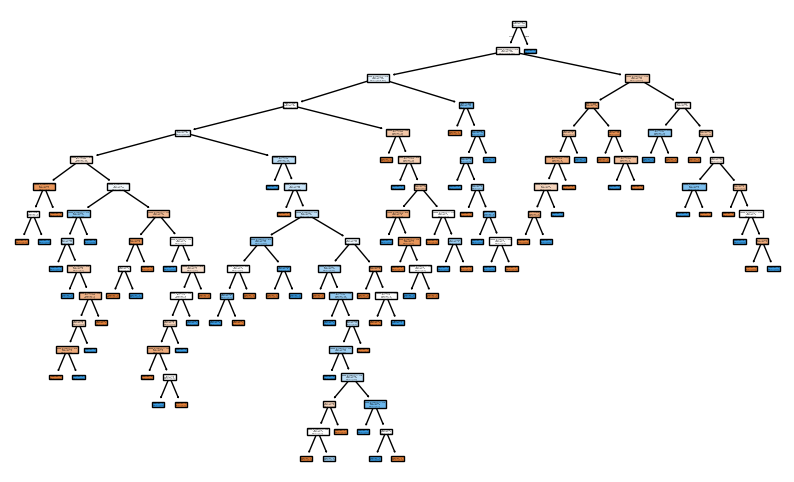

In [27]:
# visualizando a árvore construida
plt.figure(figsize=(10, 6))
plot_tree(dt1, feature_names=x_train.columns, filled=True)
plt.show()

In [28]:
# analisando as dimensões da árvore
print('Profundidade: ', dt1.get_depth())
print('Número de folhas (nós): ', dt1.get_n_leaves())

Profundidade:  16
Número de folhas (nós):  74


Claramente houve um *overfitting* desse modelo. Ele foi capaz de modelar até os ruídos e variabilidades aleatórias do conjunto de dados, mas não foi capaz de reproduzir essas correlações no conjunto de teste.

Inevitavelmente, se fizermos perguntas o suficiente, vamos conseguir modelar qualquer sistema. No entanto, isso vai tornar o modelo tão complexo e específico, que dificilmente os padrões aprendidos serão reproduzidos em outros conjuntos de dados.

Temos um modelo extremamente profundo e complexo. Isso não somente dificulta a capacidade de generalização dos dados, mas também a explicação dos resultados do modelo para pessoas não técnicas.

Precisamos de uma forma de diminuir a profundidade da árvore, mas a questão é: qual a melhor profundidade?

Esse é um típico problema de **determinação (tuning) de hiperparâmetros**.

## **Determinação de Hiperparâmetros por Validação Cruzada**

Um dos desafios de se determinar os valores corretos de hiperparâmetros é que tais valores podem ser dependentes também dos dados que estamos submetendo o modelo. Não necessariamente um conjunto de hiperparâmetros que realizem uma boa previsão num conjunto de dados terá um bom desempenho em outro conjunto de dados.

Assim precisamos buscar um conjunto de hiperparâmetros que apresentem um bom desempenho *médio*, ou seja, que apresentem desempenhos adequados em diversas bases de dados distintas.

Para isso, podemos usar o conceito de **validação cruzada em $k$ folhas**. Veja um exemplo abaixo:

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*AAwIlHM8TpAVe4l2FihNUQ.png">

Na validação cruzada de $k$ folhas, o modelo é treinado $k$ vezes, sendo que em cada vez, uma fração de $1/k$ do conjunto de dados é utilizado como base de teste, enquanto as outras $(k-1)/k$ porções são utilizadas como base de treinamento.

Ao final do treinamento, escolhemos aquele conjunto de dados que resultam no melhor desempenho médio.

In [30]:
# criando um pipeline
dt2 = Pipeline([
    ('model', DecisionTreeClassifier(random_state=2))
])

# configurar o espaço de busca
params_grid = {
    'model__max_depth': range(2, 11),
    'model__criterion': ['gini', 'entropy']
}

# configurar um amostrador de k folhas - estratificado
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

# configurar o buscador
search = GridSearchCV(
    estimator=dt2,
    param_grid=params_grid,
    scoring='accuracy',
    cv=splitter,
    refit=True,
    error_score=0,
    verbose=10
)

In [31]:
# realizar a busca
search.fit(x_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10; 1/18] START model__criterion=gini, model__max_depth=2.................
[CV 1/10; 1/18] END model__criterion=gini, model__max_depth=2;, score=0.438 total time=   0.0s
[CV 2/10; 1/18] START model__criterion=gini, model__max_depth=2.................
[CV 2/10; 1/18] END model__criterion=gini, model__max_depth=2;, score=0.312 total time=   0.0s
[CV 3/10; 1/18] START model__criterion=gini, model__max_depth=2.................
[CV 3/10; 1/18] END model__criterion=gini, model__max_depth=2;, score=0.688 total time=   0.0s
[CV 4/10; 1/18] START model__criterion=gini, model__max_depth=2.................
[CV 4/10; 1/18] END model__criterion=gini, model__max_depth=2;, score=0.500 total time=   0.0s
[CV 5/10; 1/18] START model__criterion=gini, model__max_depth=2.................
[CV 5/10; 1/18] END model__criterion=gini, model__max_depth=2;, score=0.438 total time=   0.0s
[CV 6/10; 1/18] START model__criterion=gini, model__max_d

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2, shuffle=True),
             error_score=0,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeClassifier(random_state=2))]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': range(2, 11)},
             scoring='accuracy', verbose=10)

In [32]:
# melhor combinação de parâmetros
search.best_params_

{'model__criterion': 'entropy', 'model__max_depth': 2}

In [33]:
# analisando o melhor desempenho médio
search.best_score_

0.51875

In [34]:
# analisar o desempenho final
# realizando novas previsões
yhat_dt2_train = search.best_estimator_.predict(x_train)
yhat_dt2_test = search.best_estimator_.predict(x_test)

# análise do desempenho
print('Desempenho - Base de Treino')
print(classification_report(y_train, yhat_dt2_train))

print('Desempenho - Base de Teste')
print(classification_report(y_test, yhat_dt2_test))

Desempenho - Base de Treino
              precision    recall  f1-score   support

           0       0.63      0.37      0.46        79
           1       0.56      0.79      0.66        81

    accuracy                           0.58       160
   macro avg       0.60      0.58      0.56       160
weighted avg       0.60      0.58      0.56       160

Desempenho - Base de Teste
              precision    recall  f1-score   support

           0       0.22      0.10      0.14        20
           1       0.42      0.65      0.51        20

    accuracy                           0.38        40
   macro avg       0.32      0.38      0.32        40
weighted avg       0.32      0.38      0.32        40



E se usarmos uma métrica mais voltada aos negócios para determinar o melhor conjunto de hiperparâmetros?

- aplicar a metodologia para o drug200 (drugX = 1) - testando validação cruzada de Árvore de Decisão - plotar a árvore de decisão
- DESAFIO - aplicar validação cruzada e seleção de hiperparâmetros para Reg. Logística
- DESAFIO - tentar usar as variáveis categóricas para o drug200